In [15]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
(trainX,trainy),(testX,texty) = load_data()

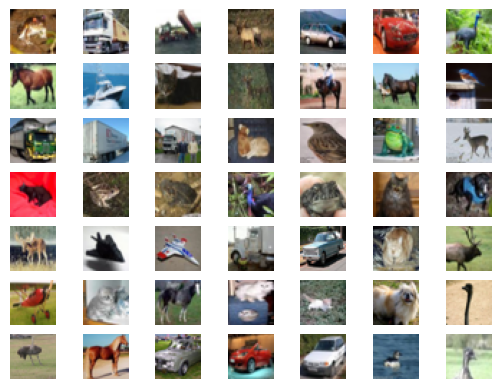

In [16]:
for i in range(49):
  pyplot.subplot(7,7,1+i)
  pyplot.axis('off')
  pyplot.imshow(trainX[i])
pyplot.show()

In [17]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
import numpy as np



In [18]:
def define_discriminator(in_shape = (32,32,3)):
  model = Sequential()
  model.add(Conv2D(64,(3,3),padding='same',input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation="sigmoid"))

  opt = Adam(lr=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 256)        

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


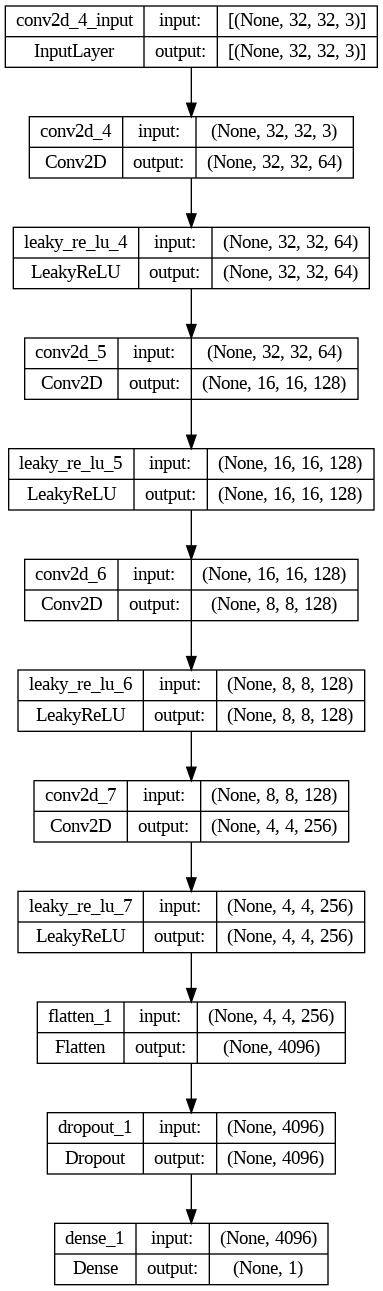

In [19]:
model = define_discriminator()

model.summary()

plot_model(model,to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)

In [21]:
def load_real_samples():
  (trainX,_),(_,_) = load_data()
  X = trainX.astype('float32')
  X = (X-127.5)/127.5
  return X

In [23]:
def generate_real_samples(dataset,n_samples):
  ix = np.random.randint(0,dataset.shape[0],n_samples)
  X = dataset[ix]
  y = np.ones((n_samples,1))
  return X,y

In [29]:
def generate_fake_samples(n_samples):
  X= np.random.rand(32*32*3*n_samples)
  X = -1 + X*2
  X = X.reshape((n_samples,32,32,3))
  y = np.zeros((n_samples,1))
  return X,y

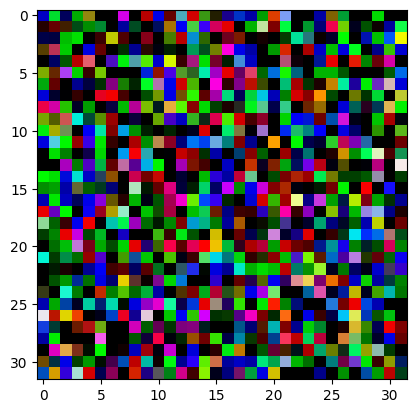

In [30]:
a,b = generate_fake_samples(64)
pyplot.imshow(a[0])

In [31]:
def train_discriminator(model,dataset,n_iter=20,n_batch=128):
  half_batch = int(n_batch/2)
  for i in range(n_iter):
    X_real,y_real = generate_real_samples(dataset,half_batch)
    _,real_acc = model.train_on_batch(X_real,y_real)
    X_fake,y_fake = generate_fake_samples(half_batch)
    _,fake_acc = model.train_on_batch(X_fake,y_fake)
    print('>%d real=%f%% fake=%.0f%%' % (i+1,real_acc*100,fake_acc*100))

In [32]:
model = define_discriminator()
dataset = load_real_samples()
train_discriminator(model,dataset)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


>1 real=40.625000% fake=2%
>2 real=96.875000% fake=8%
>3 real=93.750000% fake=16%
>4 real=90.625000% fake=44%
>5 real=89.062500% fake=69%
>6 real=85.937500% fake=91%
>7 real=84.375000% fake=100%
>8 real=85.937500% fake=100%
>9 real=84.375000% fake=100%
>10 real=87.500000% fake=100%
>11 real=92.187500% fake=100%
>12 real=79.687500% fake=100%
>13 real=92.187500% fake=100%
>14 real=96.875000% fake=100%
>15 real=96.875000% fake=100%
>16 real=98.437500% fake=100%
>17 real=100.000000% fake=100%
>18 real=100.000000% fake=100%
>19 real=100.000000% fake=100%
>20 real=100.000000% fake=100%


In [35]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

In [36]:
from keras.layers.convolutional.conv2d_transpose import Conv2DTranspose
def define_generator(latent_dim):
  model = Sequential()
  n_nodes = 256*4*4
  model.add(Dense(n_nodes,input_dim = latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
  return model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                            

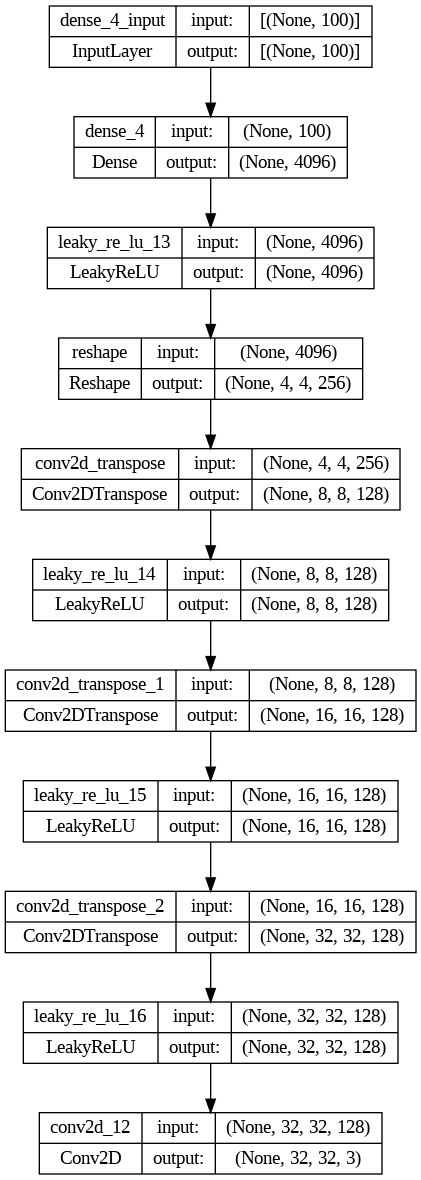

In [37]:
latent_dim = 100
model = define_generator(latent_dim)
model.summary()
plot_model(model,to_file='genetor_plot.png',show_shapes=True,show_layer_names=True)


In [39]:
def generate_latent_points(latent_dim,n_samples):
  x_input = np.random.randn(latent_dim*n_samples)
  x_input = x_input.reshape(n_samples,latent_dim)
  return x_input

In [40]:
def generate_fake_samples(g_model,latent_dim,n_samples):
  x_input = generate_latent_points(latent_dim,n_samples)
  X= g_model.predict(x_input)
  y = np.zeros((n_samples,1))
  return X,y

2/2 [==============================] - 1s 145ms/step


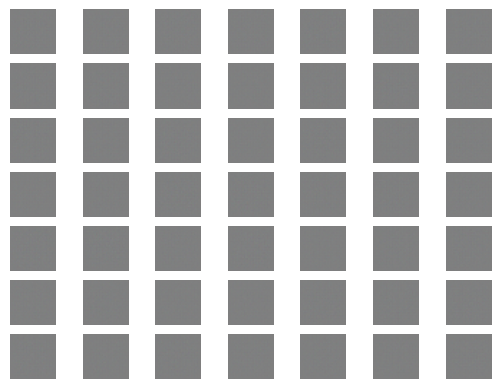

In [41]:
latent_dim = 100
model = define_generator(latent_dim)
n_samples = 49
X,_ = generate_fake_samples(model,latent_dim,n_samples)
X = (X+1)/2.0
for i in range(n_samples):
  pyplot.subplot(7,7,1+i)
  pyplot.axis('off')
  pyplot.imshow(X[i])
pyplot.show()

In [42]:
def define_gan(g_model,d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  opt = Adam(lr = 0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt)
  return model


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_6 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


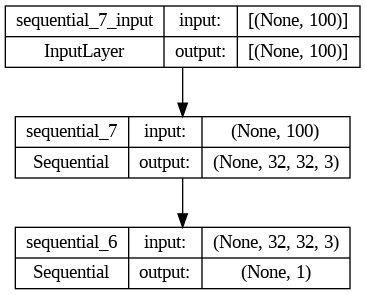

In [43]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model,d_model)
gan_model.summary()
plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)


In [44]:
def save_plot(examples,epoch,n=7):
  examples = (examples+1)/2.0
  for i in range(n*n):
    pyplot.subplot(n,n,1+i)
    pyplot.axis('off')
    pyplot.imshow(examples[i])
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()

In [45]:
def summerize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples = 150):
  X_real,y_real = generate_real_samples(dataset,n_samples)
  _,acc_real = d_model.evaluate(X_real,y_real,verbose=0)
  x_fake,y_fake = generate_fake_samples(g_model,latent_dim,n_samples)
  _,acc_fake = d_model.evaluate(x_fake,y_fake,verbose=0)
  print('>Accuracy real:%.0f%%, fake: %.0f%%' % (acc_real*100,acc_fake*100))
  save_plot(x_fake,epoch)
  filename = 'generator_model_%03d.h5' % (epoch+1)
  g_model.sabe(filename)



In [46]:
def train(g_model,d_model,gan_model,latent_dim,n_epochs=200,n_batch=128):
  bat_per_epo = int(dataset.shape[0]/n_batch)
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    for j in range(bat_per_epo):
      X_real,y_real = generate_real_samples(dataset,half_batch)
      d_loss1,_ = d_model.train_on_batch(X_real,y_real)
      X_fake,y_fake = generate_fake_samples(g_model,latent_dim,half_batch)
      d_loss2,_ = d_model.train_on_batch(X_fake,y_fake)
      X_gan = generate_latent_points(latent_dim,n_batch)
      y_gan = np.ones((n_batch,1))
      g_loss = gan_model.train_on_batch(X_gan,y_gan)
      print('>%d %d/%d, d1=%.3f, d2=%.3f g=%.3f'%
            (i+1,j+1,bat_per_epo,d_loss1,d_loss2,g_loss))
    if(i+1)%10 == 0:
      summerize_performance(i,g_model,d_model,dataset,latent_dim)


In [48]:
train(g_model,d_model,gan_model,latent_dim,n_epochs=200,n_batch=128)


2/2 [==============================] - 0s 237ms/step
>1 1/390, d1=0.228, d2=0.905 g=0.560
2/2 [==============================] - 0s 248ms/step
>1 2/390, d1=0.172, d2=0.991 g=0.548
2/2 [==============================] - 0s 238ms/step
>1 3/390, d1=0.182, d2=0.972 g=0.586
2/2 [==============================] - 0s 243ms/step
>1 4/390, d1=0.195, d2=0.859 g=0.669
2/2 [==============================] - 0s 245ms/step
>1 5/390, d1=0.168, d2=0.716 g=0.797
2/2 [==============================] - 0s 230ms/step
>1 6/390, d1=0.163, d2=0.608 g=0.935
2/2 [==============================] - 1s 394ms/step
>1 7/390, d1=0.173, d2=0.550 g=1.021
2/2 [==============================] - 1s 249ms/step
>1 8/390, d1=0.184, d2=0.546 g=1.007
2/2 [==============================] - 0s 231ms/step
>1 9/390, d1=0.150, d2=0.559 g=0.935
2/2 [==============================] - 0s 239ms/step
>1 10/390, d1=0.106, d2=0.587 g=0.873
2/2 [==============================] - 0s 237ms/step
>1 11/390, d1=0.174, d2=0.612 g=0.822
2/2 [===

KeyboardInterrupt: ignored